#### This notebook demonstrates the code used in ["A Syntactic Profile of (Re)Telling in _The Woman Warrior_"](A_Syntactic_Profile_of_(Re)Telling_in_The_Woman_Warrior.pdf) with a shorter, more simple sample text. Please see the paper for complete explanations of the design rationale, definitions of linguistic variables, and conclusions about the original text.

#### Importing functions needed for parsing and visualizing results...

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Custom function to extract linguistic features from texts
from parser import extract_data

# Custom function to plot conditional distributions of thematic relations
from distr import conditional

# Custom function to plot temporal appearances of thematic relations
from counter import temporal

#### Opening the sample text file...

Please note this sample document is written by me and replicates the relevant linguistic features of _The Woman Warrior_.

In [2]:
with open('sample_text.txt', 'r') as file:
    txt = file.read() 

print('Sample text looks like: \n\n' + txt[:400])

Sample text looks like: 

I[Maxine, feminine, first, singular, subject, experiencer] remember the rainy day that my mother[mother, feminine, third, singular, subject, agent] took me[Maxine, feminine, first, singular, direct object, theme] to school. My father[father, masculine, first, singular, subject, theme] was sick with the flu and [father, masculine, third, singular, subject, agent]stayed at home that whole week; othe


#### There are a total of 32 "person argument" data points. The following table shows a random sample from the data points.

In [3]:
df = extract_data(txt)
print(len(df))
df.sample(5)

32


,Interactional Role,Gender,Person,Number,Grammatical Function,Theta Role
10,father,masculine,third,singular,subject,agent
20,mother,feminine,third,singular,object of preposition,goal
7,father,masculine,third,singular,subject,theme
25,mother,feminine,third,singular,subject,experiencer
22,mother,feminine,third,singular,subject,agent


#### The following graph shows that there are more data points of arguments with the "feminine" gender feature (inferred) than the "masculine" feature (22:10). Conditional distributions show that "masculine" arguments are more linguistically agentive, and "feminine" arguments occupy a more diverse set of thematic relations.

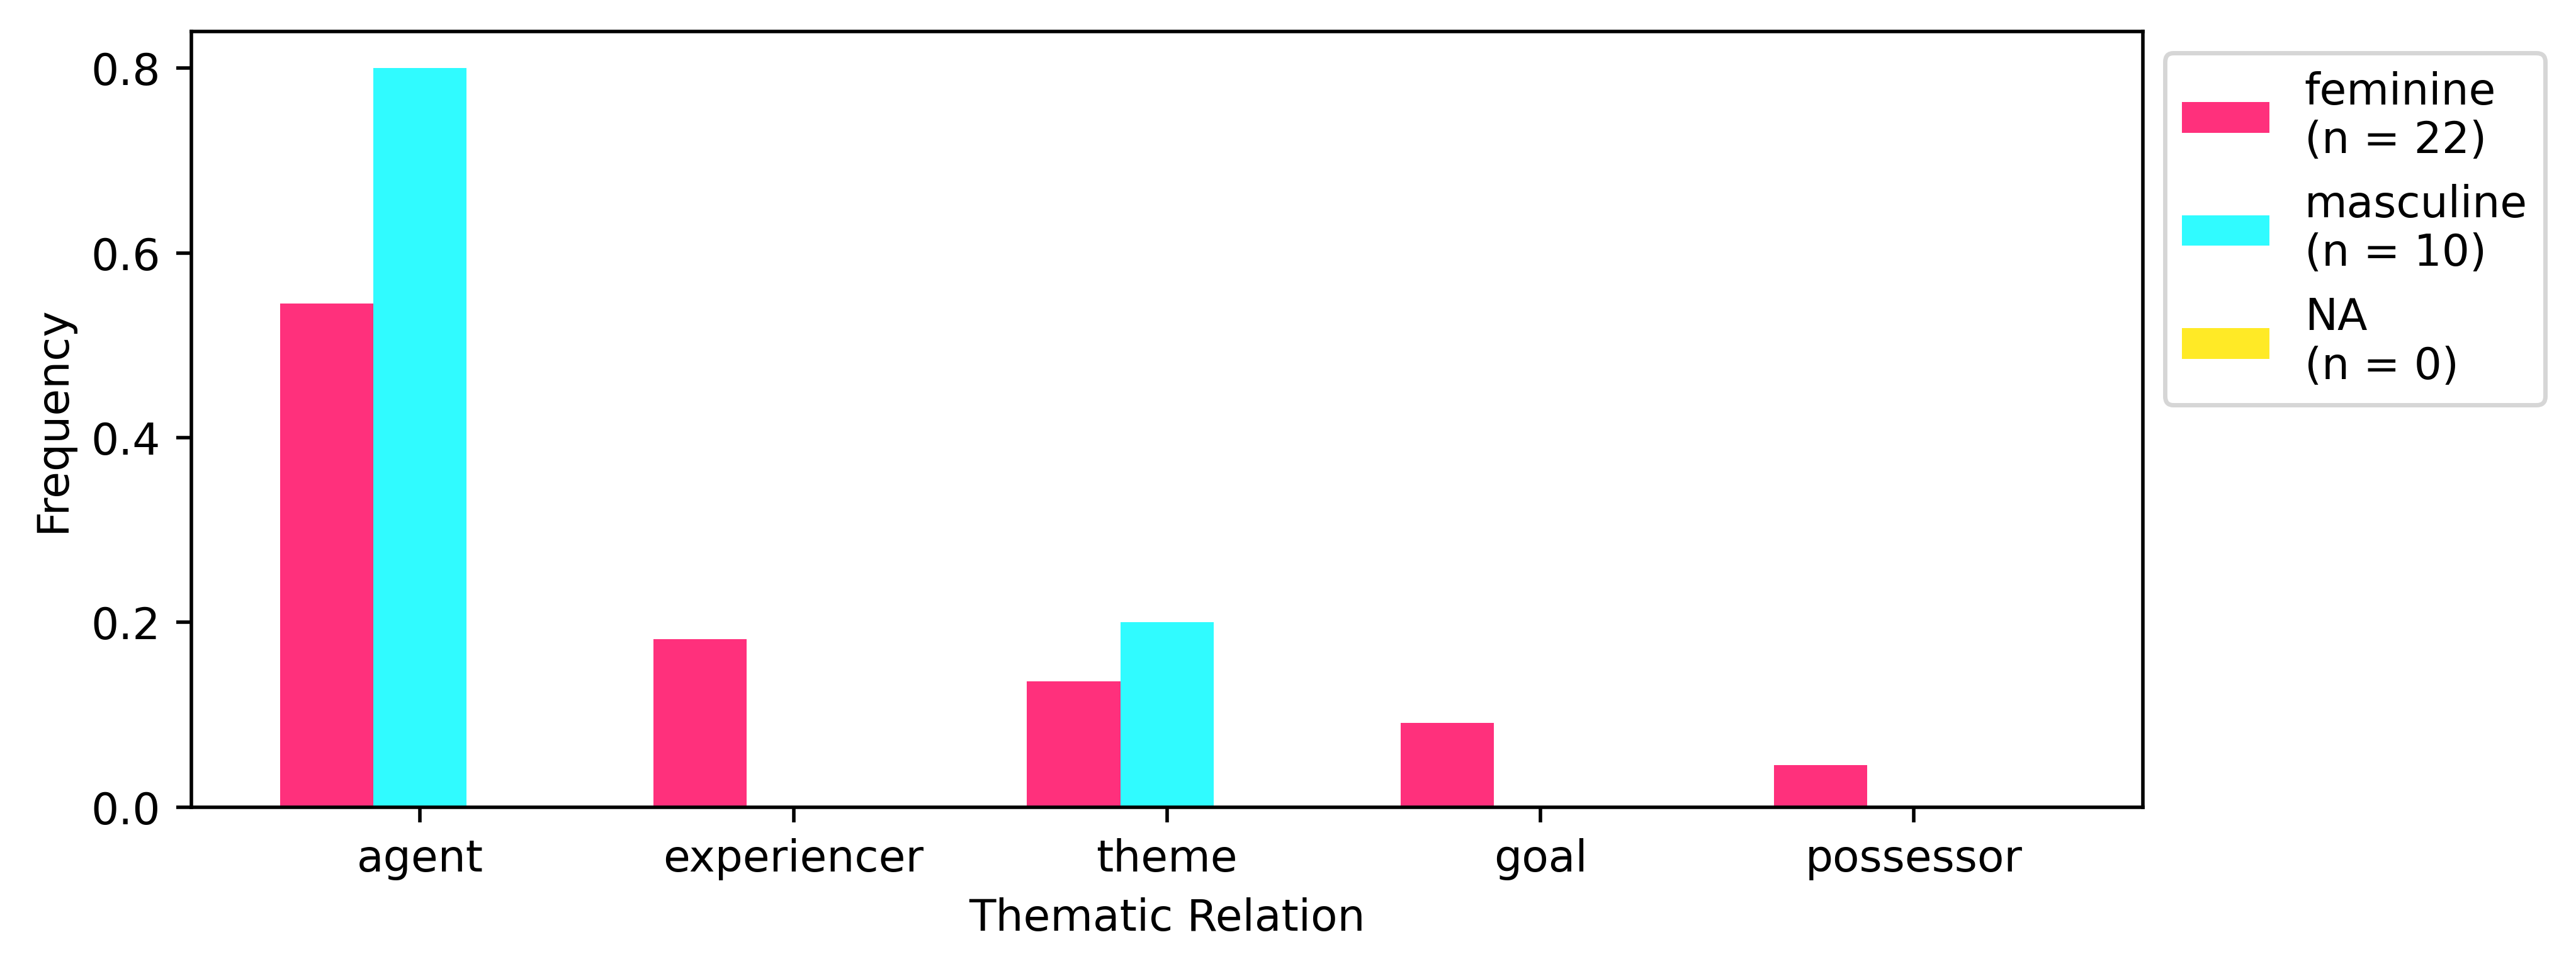

In [4]:
conditions = [
    ['feminine'],
    ['masculine'],
    ['NA']
]

conditional(df=df, title=f'Comparison of {len(conditions)} Conditional Distributions:', y='thematic', y_measure='frequency', conditions=conditions)
    

#### The following graph shows that when the "grammatical function" variable is controlled, the ratio of "feminine":"masculine" data points shrinks to 17:10 disproportionately, meaning that "masculine" arguments are more likely to occupy the subject position.

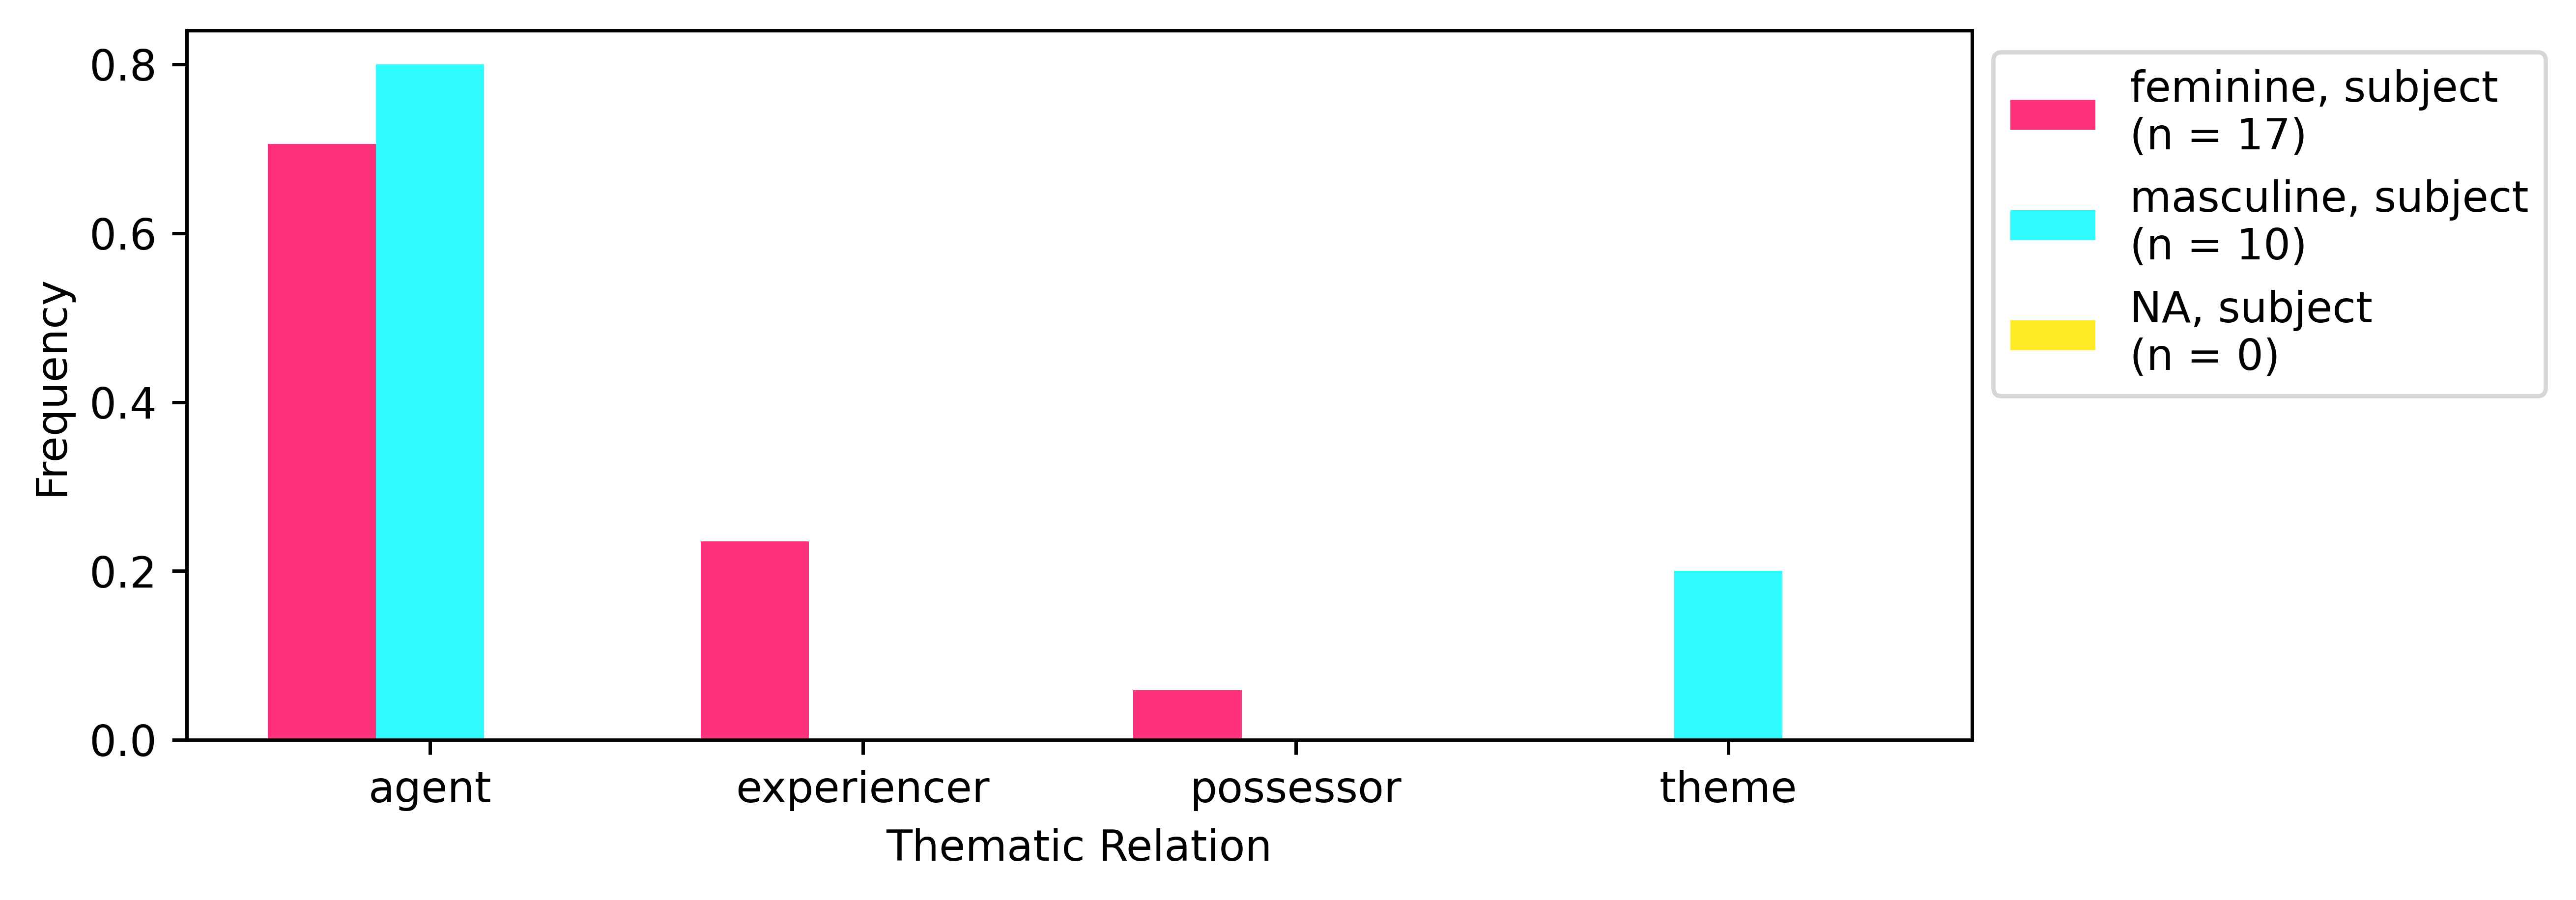

In [5]:
conditions = [
    ['feminine', 'subject'],
    ['masculine', 'subject'],
    ['NA', 'subject']
]

conditional(df=df, title=f'Comparison of {len(conditions)} Conditional Distributions:', y='thematic', y_measure='frequency', conditions=conditions)


#### The following three graphs show that the text has a "first-person" frame that starts off as "singular" and ends as "plural". The text departs from "Maxine"'s first-person experience, develops into a temporally bifocal narrative about third-person characters "father" and "mother", and concludes in the actions of "plural" "feminine" characters. The "feminine" characters occupy a more diverse set of thematic relations as shown by its higher permeability through the levels of thematic relations.

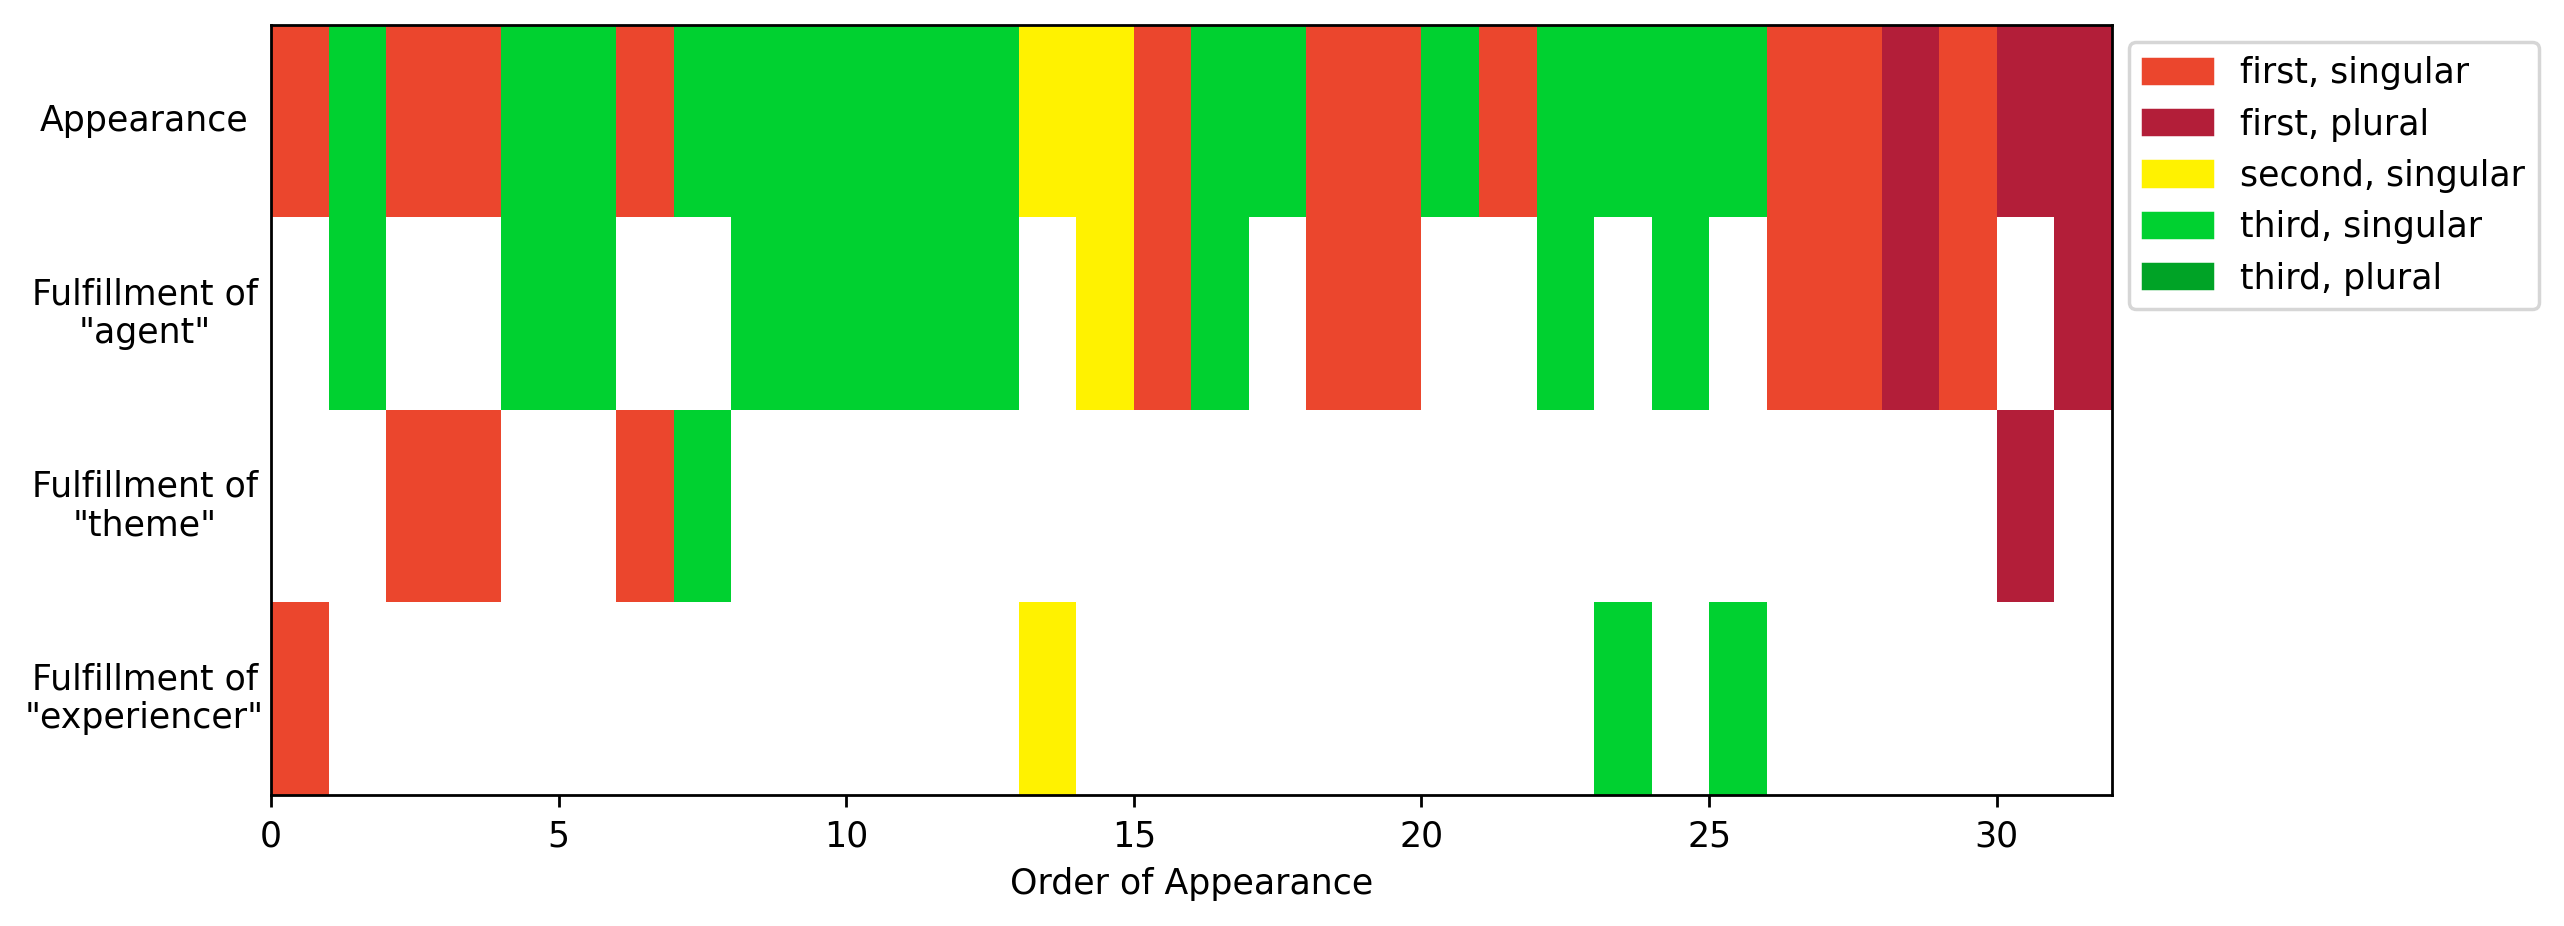

In [6]:
observations = [
    ['first', 'singular'],
    ['first', 'plural'],
    ['second', 'singular'],
    ['second', 'plural'],
    ['third', 'singular'],
    ['third', 'plural'],
]

temporal(df=df,observations=observations)

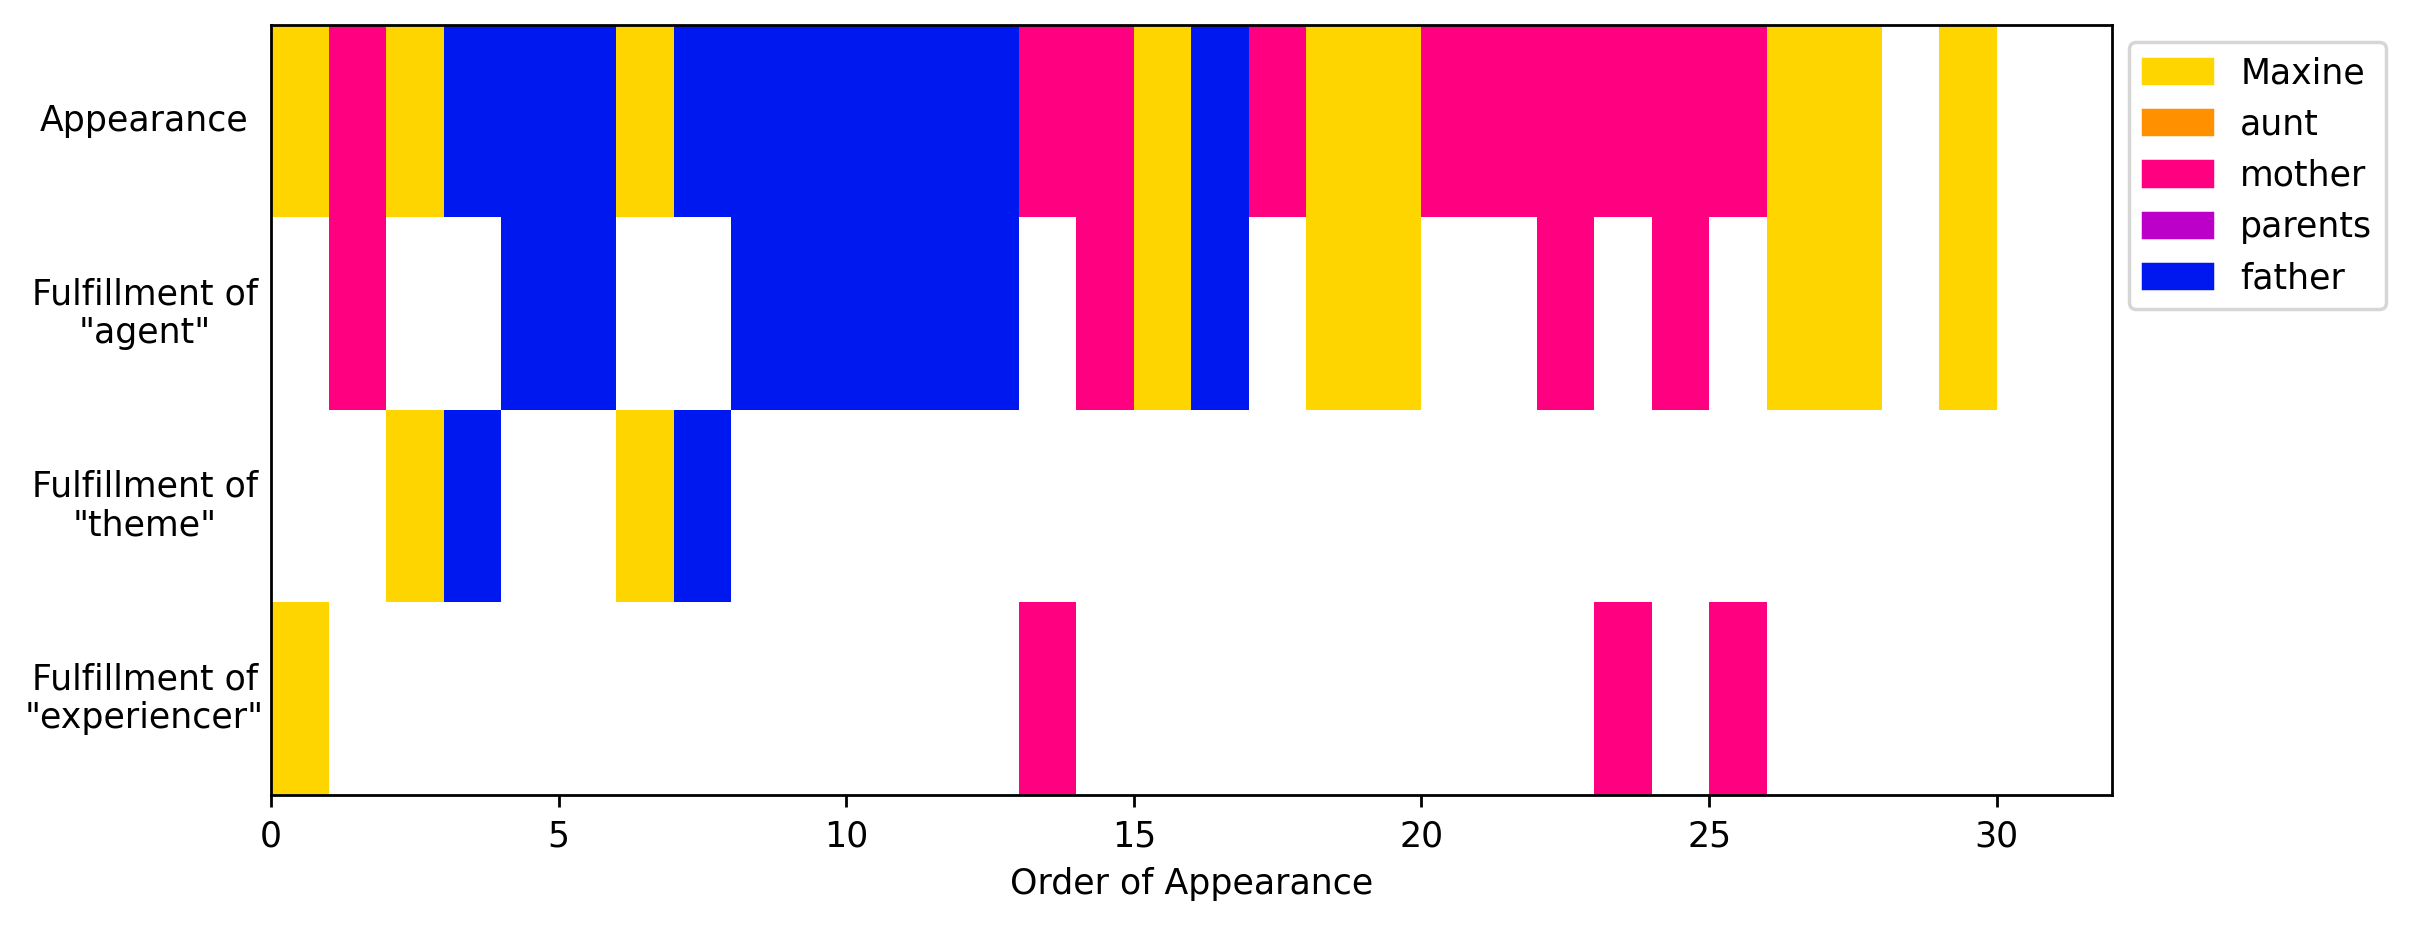

In [7]:
observations = [
    ['Maxine'],
    ['aunt'],
    ['mother'],
    ['parents'],
    ['father']
]

temporal(df=df,observations=observations)

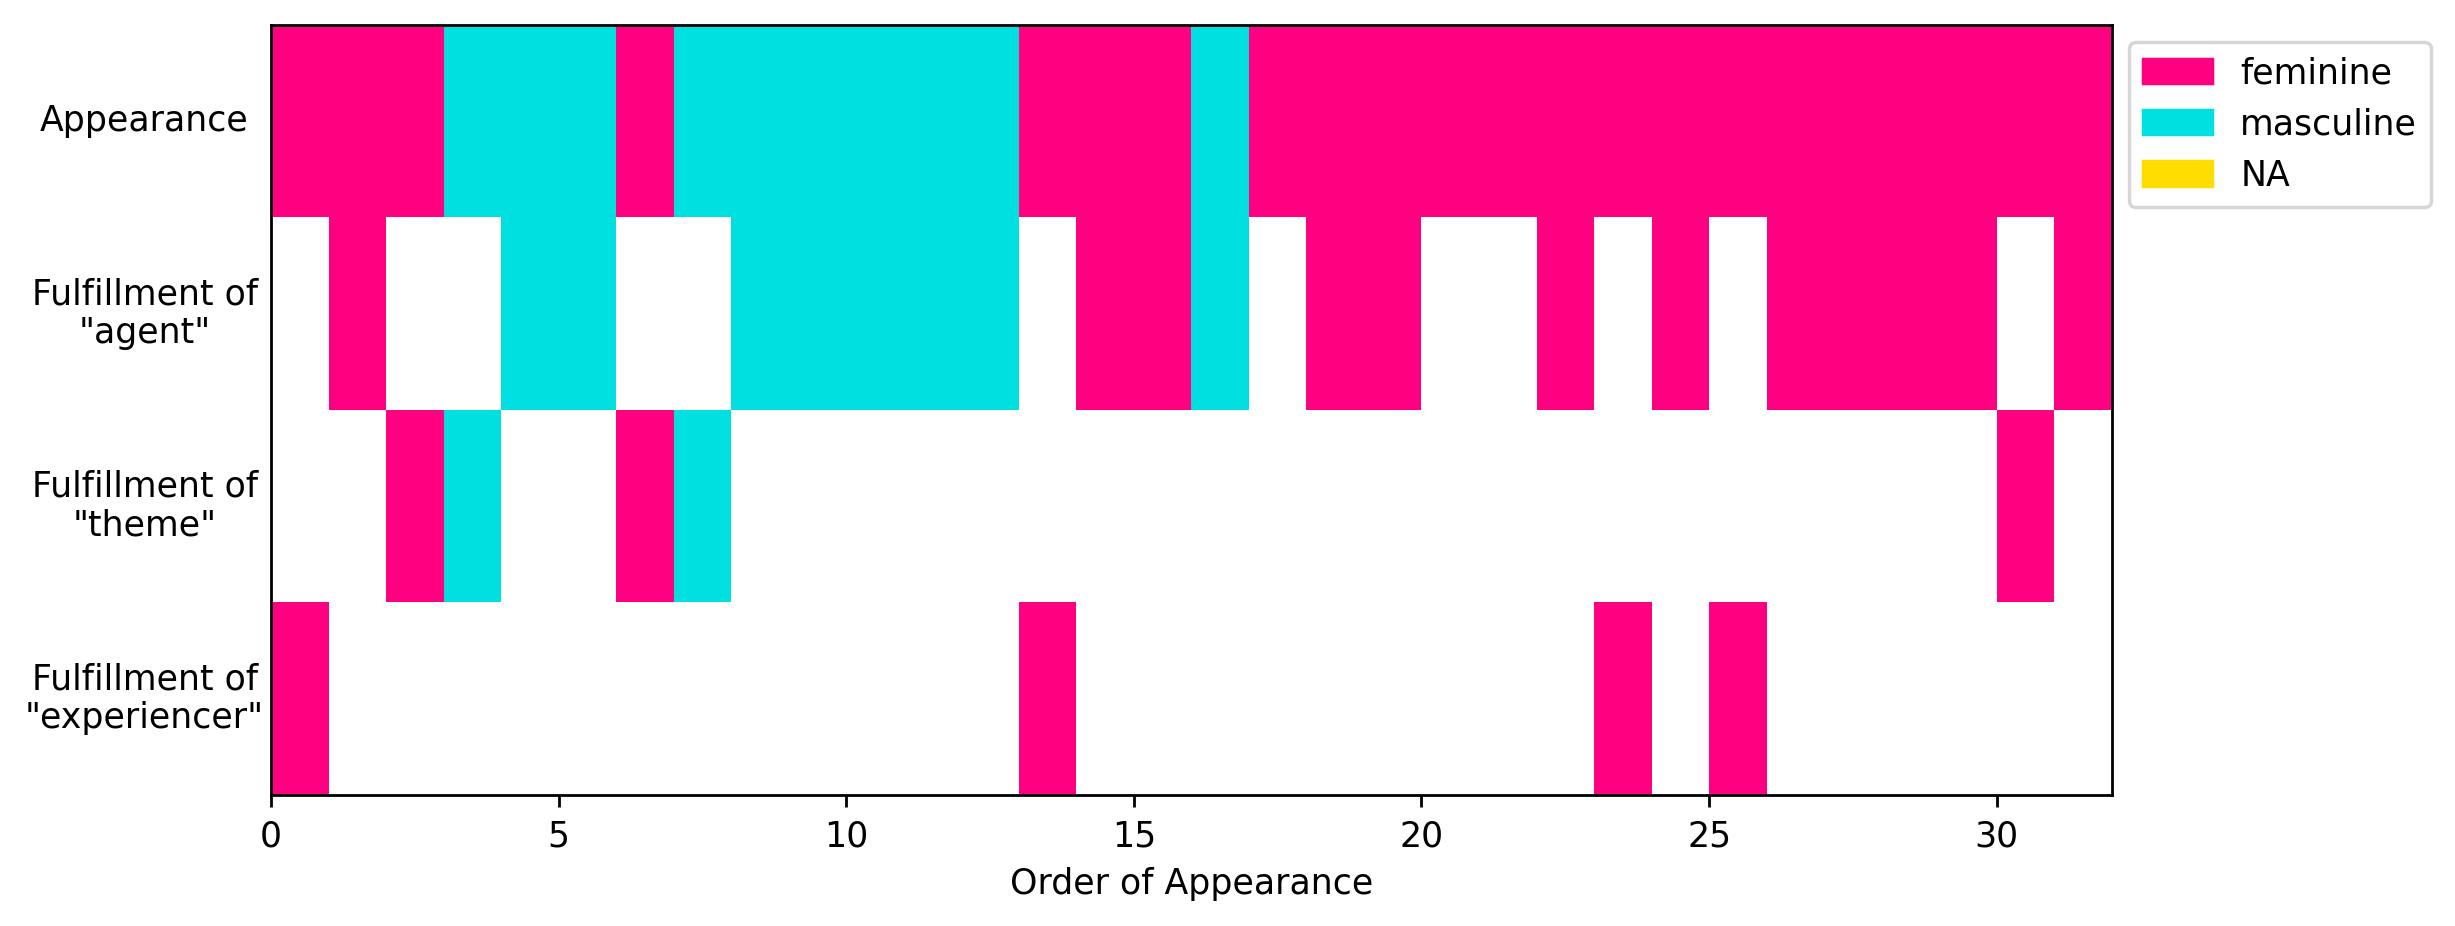

In [8]:
observations = [
    ['feminine'],
    ['masculine'],
    ['NA']
]

temporal(df=df,observations=observations)